<a href="https://colab.research.google.com/github/nandinisingh7/Computer-Vision/blob/main/Nandini_Singh_CV6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nandini Singh

1032211677

Division A1

Batch A2

Face Recognition

In [102]:
import cv2
import matplotlib.pyplot as plt

In [103]:
img = cv2.imread("/content/drive/MyDrive/Face Images/Final Training Images/face17/9image17.jpg")
img.shape

(1946, 1184, 3)

In [104]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray.shape

(1946, 1184)

In [105]:
#load the classifier

face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

In [106]:
#Perform the Face Detection

face = face_classifier.detectMultiScale(
    img_gray, scaleFactor=1.1, minNeighbors=25, minSize=(40, 40)
)

In [107]:
#now we will draw a rectangular bounding box around the face

for (x,y,w,h) in face:
  cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 4)     #4 is the thickness of the boundary of the bounding box

In [108]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(-0.5, 1183.5, 1945.5, -0.5)

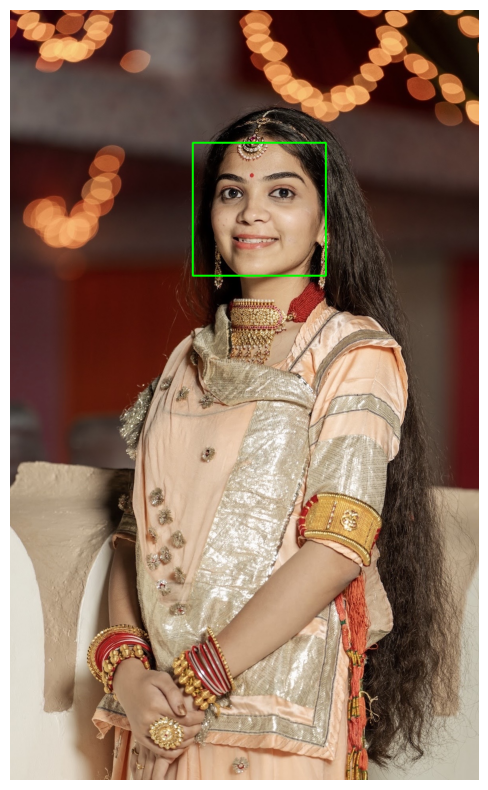

In [109]:
plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')

Face Detection

In [110]:
trainingImagePath = '/content/drive/MyDrive/Face Images/Final Training Images'
testImagePath = '/content/drive/MyDrive/Face Images/Final Testing Images'

In [111]:
from keras.preprocessing.image import ImageDataGenerator

In [112]:
train_datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)

In [113]:
#we wont apply any pre processimg on the raw images of the test dataset

test_datagen = ImageDataGenerator()

In [114]:
# Generating the Training Data
training_set = train_datagen.flow_from_directory(
        trainingImagePath,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 256 images belonging to 17 classes.


In [115]:
# Generating the Testing Data
test_set = test_datagen.flow_from_directory(
        testImagePath,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 66 images belonging to 17 classes.


In [116]:
# Printing class labels for each face
test_set.class_indices

{'face1': 0,
 'face10': 1,
 'face11': 2,
 'face12': 3,
 'face13': 4,
 'face14': 5,
 'face15': 6,
 'face16': 7,
 'face17': 8,
 'face2': 9,
 'face3': 10,
 'face4': 11,
 'face5': 12,
 'face6': 13,
 'face7': 14,
 'face8': 15,
 'face9': 16}

In [117]:
# class_indices have the numeric tag for each face
TrainClasses=training_set.class_indices

# Storing the face and the numeric tag for future reference
ResultMap={}
for faceValue,faceName in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[faceValue]=faceName

# Saving the face map for future reference
import pickle
with open("ResultsMap.pkl", 'wb') as fileWriteStream:
    pickle.dump(ResultMap, fileWriteStream)

# The model will give answer as a numeric tag
# This mapping will help to get the corresponding face name for it
print("Mapping of Face and its ID",ResultMap)

# The number of neurons for the output layer is equal to the number of faces
OutputNeurons=len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)

Mapping of Face and its ID {0: 'face1', 1: 'face10', 2: 'face11', 3: 'face12', 4: 'face13', 5: 'face14', 6: 'face15', 7: 'face16', 8: 'face17', 9: 'face2', 10: 'face3', 11: 'face4', 12: 'face5', 13: 'face6', 14: 'face7', 15: 'face8', 16: 'face9'}

 The Number of output neurons:  17


In [118]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

In [119]:
'''Initializing the Convolutional Neural Network'''
classifier= Sequential()

''' STEP--1 Convolution
# Adding the first layer of CNN
# we are using the format (64,64,3) because we are using TensorFlow backend
# It means 3 matrix of size (64X64) pixels representing Red, Green and Blue components of pixels
'''
classifier.add(Convolution2D(32, kernel_size=(5, 5), strides=(1, 1), input_shape=(64,64,3), activation='relu'))

'''STEP--2 MAX Pooling'''
classifier.add(MaxPool2D(pool_size=(2,2)))

''' ADDITIONAL LAYER of CONVOLUTION for better accuracy'''
classifier.add(Convolution2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu'))

classifier.add(MaxPool2D(pool_size=(2,2)))

''' STEP--3 FLattening'''
classifier.add(Flatten())

'''STEP--4 Fully Connected Neural Network'''
classifier.add(Dense(64, activation='relu'))

classifier.add(Dense(OutputNeurons, activation='softmax'))

'''Compiling the CNN'''
#classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])



# Starting the model training
classifier.fit(
    training_set,
    steps_per_epoch=8,         #number of steps per epoch = (Total number of training samples / Batch size), here i have 244 training images and the batch size is 32, therefore the steps_per_epochs comes out to be 7.6 = 8
    epochs=10,
    validation_data=test_set,
    validation_steps=10
)

Epoch 1/10
8/8 [==============================] - ETA: 0s - loss: 84.0035 - accuracy: 0.0508

8/8 [==============================] - 5s 524ms/step - loss: 84.0035 - accuracy: 0.0508 - val_loss: 3.4386 - val_accuracy: 0.0909
Epoch 2/10
8/8 [==============================] - 4s 503ms/step - loss: 2.8653 - accuracy: 0.1094
Epoch 3/10
8/8 [==============================] - 4s 458ms/step - loss: 2.3249 - accuracy: 0.3008
Epoch 4/10
8/8 [==============================] - 3s 377ms/step - loss: 1.3788 - accuracy: 0.5977
Epoch 5/10
8/8 [==============================] - 3s 394ms/step - loss: 0.7555 - accuracy: 0.7852
Epoch 6/10
8/8 [==============================] - 4s 460ms/step - loss: 0.3177 - accuracy: 0.9219
Epoch 7/10
8/8 [==============================] - 3s 388ms/step - loss: 0.1495 - accuracy: 0.9492
Epoch 8/10
8/8 [==============================] - 3s 389ms/step - loss: 0.1140 - accuracy: 0.9766
Epoch 9/10
8/8 [==============================] - 4s 515ms/step - loss: 0.0566 - accuracy: 0.9805
Epoch 10/10
8/8 [==============================] - 4s 450ms/step - loss: 0.0556 - accu

Prediction is:  face17


<function matplotlib.pyplot.show(close=None, block=None)>

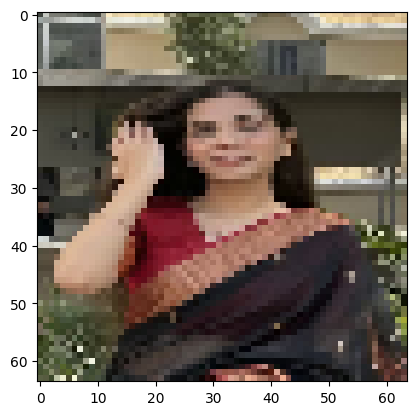

In [120]:
'''Making single predictions'''
import numpy as np
from keras.preprocessing import image

ImagePath='/content/drive/MyDrive/Face Images/Final Testing Images/face17/11image17.jpg'
test_image=image.load_img(ImagePath,target_size=(64, 64))
test_image=image.img_to_array(test_image)

test_image=np.expand_dims(test_image,axis=0)

result=classifier.predict(test_image,verbose=0)
#print(training_set.class_indices)


print('Prediction is: ',ResultMap[np.argmax(result)])

import matplotlib.pyplot as plt
plt.imshow(test_image[0]/255)
plt.show